In [471]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import os, glob
import operator as op

In [472]:
class CV:
    def __init__(self,v=np.nan,epc=np.nan,ipc=np.nan,epa=np.nan,ipa=np.nan,c=np.nan):
        self.v=np.array(v)
        self.epc=np.array(epc)
        self.ipc=np.array(ipc)
        self.epa=np.array(epa)
        self.ipa=np.array(ipa)
        self.c=c
        self.DE=self.epa-self.epc
        self.Ezeroprim=(self.epa+self.epc)/2
    def kal(self):
        a=np.polyfit(self.c, self.ipc,1)[0]
        b=np.polyfit(self.c, self.ipc,1)[1]
        r=np.polyfit(self.c, self.ipc,1,full=True)[1]
        R2=1 - r / sum((self.ipc - self.ipc.mean())**2)
        zakres=np.array([self.c[0],self.c[-1]])
        plt.scatter(self.c, self.ipc)
        plt.plot(zakres,a*zakres+b,color='r')
        plt.xlabel('C [mM/l]')
        plt.style.use('seaborn-whitegrid')
        plt.ylabel('I [$\mu$A]')
        plt.annotate(f'y={round(a,4)}x+{round(b,4)}\nR$^2$={round(float(R2),4)}', xy=(0.55, 0.85), xycoords='axes fraction')
        self.p=[a,b,R2]
    def C(self,ipc):
        a=self.p[0]
        b=self.p[1]
        c=(ipc-b)/a
        plt.scatter(c,ipc)
        self.ckal=c
    def D(self,A):
        self.Da=((self.ipa*10**(-6))**2)/((2.72*10**5*A*self.c)**2*self.v/1000)
        self.Dc=((self.ipc*10**(-6))**2)/((2.72*10**5*A*self.c)**2*self.v/1000)
        D=10**6*np.concatenate((self.Dc,self.Da))
        self.D=[D.mean(),D.std()]
class SWV:
    def __init__(self,f=np.nan,epc=np.nan,ipc=np.nan,c=np.nan):
        self.f=f
        self.epc=epc
        self.ipc=ipc
        self.c=c
    def kal(self):
        a=np.polyfit(self.c, self.ipc,1)[0]
        b=np.polyfit(self.c, self.ipc,1)[1]
        r=np.polyfit(self.c, self.ipc,1,full=True)[1]
        R2=1 - r / sum((self.ipc - self.ipc.mean())**2)
        zakres=np.array([self.c[0],self.c[-1]])
        plt.scatter(self.c, self.ipc)
        plt.plot(zakres,a*zakres+b,color='r')
        plt.style.use('seaborn-whitegrid')
        plt.xlabel('C [mM/l]')
        plt.ylabel('I [$\mu$A]')
        plt.annotate(f'y={round(a,4)}x+{round(b,4)}\nR$^2$={round(float(R2),4)}', xy=(0.55, 0.85), xycoords='axes fraction')
        self.p=[a,b,R2]
    def C(self,ipc):
        a=self.p[0]
        b=self.p[1]
        c=(ipc-b)/a
        plt.scatter(c,ipc)
        self.ckal=c

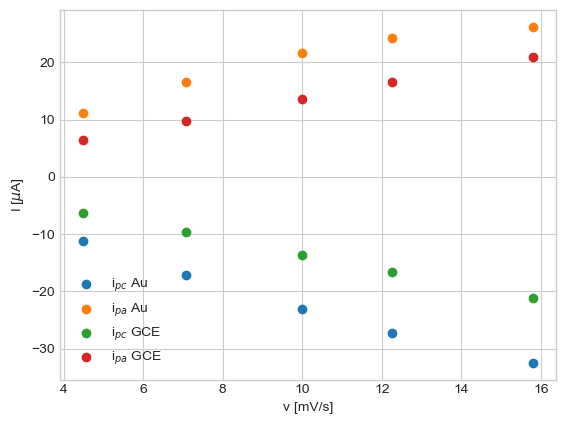

In [473]:
c=2*10*(-3)
v=np.array([20,50,100,150,250])
epc=[0.150,0.141,0.132,0.126,0.106]
ipc=[-11.2,-17.05,-23.06,-27.34,-32.46] #\muA
epa=[0.242, 0.25, 0.259, 0.268, 0.281]
ipa=[11.24,16.64,21.57,24.24,26.22]
AuCV=CV(v,epc,ipc,epa,ipa,c=c)
v=np.array([20,50,100,150,250])
epc=[0.159,0.158,0.158,0.159,0.159]
ipc=[-6.268,-9.703,-13.59,-16.54,-21.17]
epa=[0.221,0.221,0.221,0.222,0.223]
ipa=[6.503,9.804,13.54,16.49,20.96]
GCECV=CV(v,epc,ipc,epa,ipa,c=c)
plt.scatter(AuCV.v**(1/2),AuCV.ipc,color='C0',label='i$_{pc}$ Au')
plt.scatter(AuCV.v**(1/2),AuCV.ipa,color='C1',label='i$_{pa}$ Au')
plt.scatter(GCECV.v**(1/2),GCECV.ipc,color='C2',label='i$_{pc}$ GCE')
plt.scatter(GCECV.v**(1/2),GCECV.ipa,color='C3',label='i$_{pa}$ GCE')
plt.ylabel('I [$\mu$A]')
plt.xlabel('v [mV/s]')
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.show()

Text(0.5, 0, 'f [Hz]')

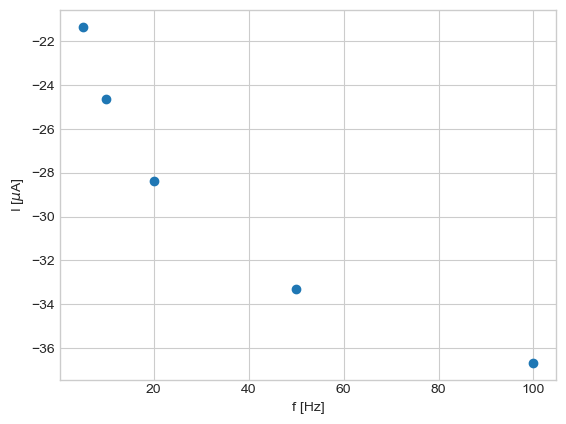

In [474]:
f=[5,10,20,50,100]
epc=[0.188,0.188,0.184,0.172,0.164]
ipc=[-21.33,-24.63,-28.36,-33.3,-36.67]
GCESWV=SWV(f,epc,ipc)
plt.scatter(GCESWV.f,GCESWV.ipc)
plt.style.use('seaborn-whitegrid')
plt.ylabel('I [$\mu$A]')
plt.xlabel('f [Hz]')

In [475]:
c=np.array([2,4,6,8,10])
epc=[0.141, 0.082, 0.103, 0.125, 0.135]
ipc=-np.array([17.05, 29.23, 49.32, 73.36, 91.83])
kal50CV=CV(c=c,v=50,ipc=ipc,epc=epc)
epc=[0.106,0.040,0.064,0.099,0.107]
ipc=-np.array([32.46,49.05,86.19,142.9,178.6])
kal250CV=CV(c=c,v=250,epc=epc,ipc=ipc)
epc=[0.188, 0.172, 0.168, 0.184, 0.188]
ipc=-np.array([21.33, 23.55, 34.47, 80.11, 93.57])
kal5SWV=SWV(f=5,c=c,epc=epc,ipc=ipc)
epc=[0.164, 0.124, 0.116, 0.152, 0.152]
ipc=-np.array([36.67, 38.17, 60.38, 131.7, 157.5])
kal100SWV=SWV(f=100,c=c,epc=epc,ipc=ipc)

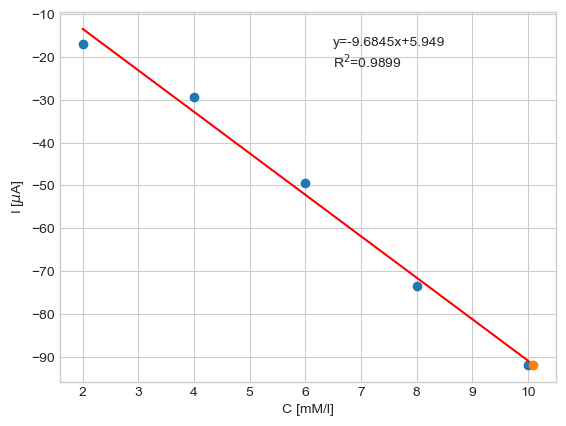

([-9.6845, 5.948999999999991, array([0.98993858])], 10.098507925034847)

In [476]:
kal50CV.kal()
kal50CV.C(-91.85)
plt.show()
kal50CV.p,kal50CV.ckal

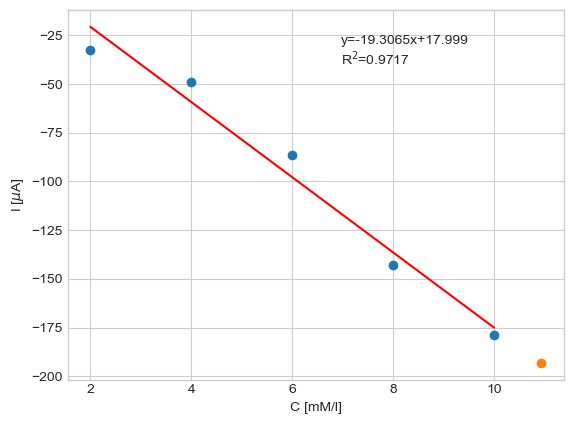

([-19.306499999999996, 17.998999999999967, array([0.97173527])],
 10.934089555331106)

In [477]:
kal250CV.kal()
kal250CV.C(-193.1)
plt.show()
kal250CV.p,kal250CV.ckal

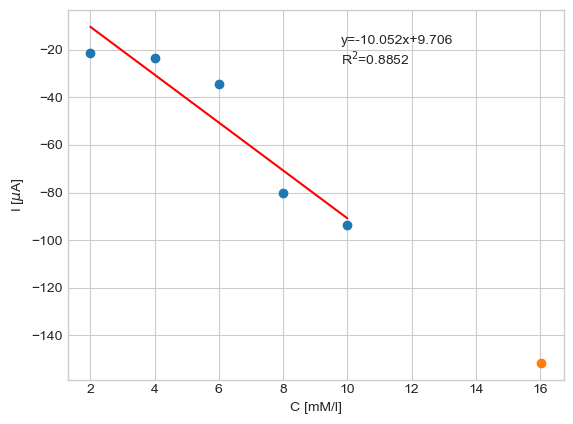

([-10.052, 9.705999999999987, array([0.8851994])], 16.037206526064466)

In [478]:
kal5SWV.kal()
kal5SWV.C(-151.5)
plt.show()
kal5SWV.p,kal5SWV.ckal

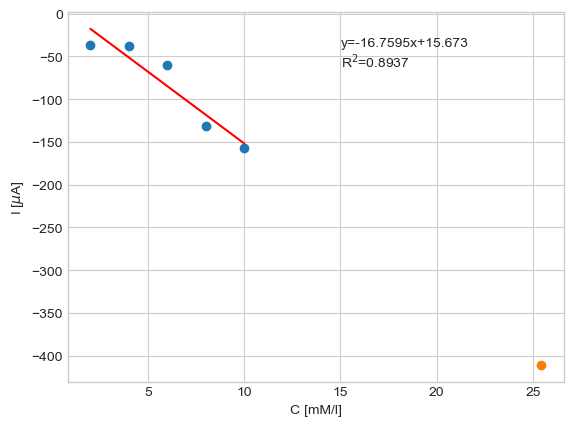

([-16.759499999999996, 15.672999999999966, array([0.89366724])],
 25.434708672693105)

In [479]:
kal100SWV.kal()
kal100SWV.C(-410.6)
plt.show()
kal100SWV.p,kal100SWV.ckal

In [480]:
AGCE=np.pi*(1.5*0.1)**2
AAu=np.pi*(0.8*0.1)**2
AuCV.D(AAu)
GCECV.D(AGCE)
AuCV.D, GCECV.D

([4.622951190185608e-14, 9.904571528136483e-15],
 [1.4090229196207005e-15, 7.41172084441449e-17])

In [481]:
AGCE,AAu

(0.07068583470577036, 0.020106192982974686)

In [482]:
AuCV.Ezeroprim, GCECV.Ezeroprim

(array([0.196 , 0.1955, 0.1955, 0.197 , 0.1935]),
 array([0.19  , 0.1895, 0.1895, 0.1905, 0.191 ]))

In [483]:
AuCV.DE*1000, GCECV.DE*1000

(array([ 92., 109., 127., 142., 175.]), array([62., 63., 63., 63., 64.]))